In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
wine_data = pd.read_csv(
    'C:/Users/hp/Desktop/MyNotebook/dataset/winequality-white.csv',
names=["Fixed Acidity","Volatile Acidity","Citric Acid","Residual Sugar","Chlorides",
       "Free Sulfur Dioxide","Total Sulfur Dioxide","Density","pH","Sulphates",
       "Alcohol","Quality"],
skiprows=1,
sep=r'\s*\;s*',
engine='python',)

In [5]:
wine_data.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

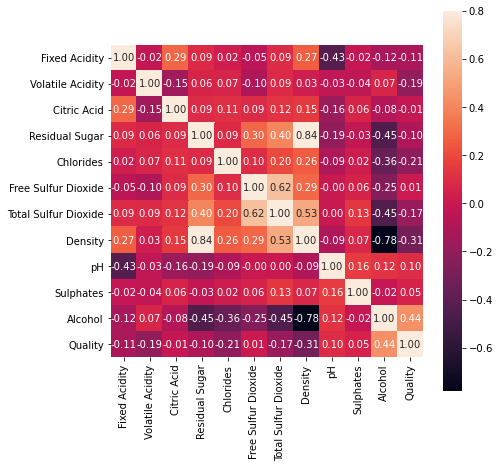

In [8]:
corrmat =  wine_data.corr()
f, ax =  plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=0.8,square=True, annot=True, fmt='.2f');
plt.show()

In [9]:
X = wine_data.drop('Quality', axis=1)
Y = wine_data['Quality']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
classifier = DecisionTreeClassifier() 

In [14]:
classifier

DecisionTreeClassifier()

In [15]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
score = classifier.score(x_test,y_test)
print(score)

0.5744897959183674


In [17]:
#good accuracy as we have 7 different values for quality of wine.

In [18]:
classifier.n_features_

11

In [19]:
classifier.feature_importances_

array([0.07596664, 0.10061593, 0.07661188, 0.07476734, 0.08723803,
       0.10490781, 0.09343829, 0.08114093, 0.08931404, 0.08144544,
       0.13455367])

In [20]:
#tool to visualize decision tree - graphviz

In [21]:
import sklearn.tree as tree
tree.export_graphviz(classifier,out_file='tree.dot', feature_names=X.columns)

In [26]:
# from subprocess import call

# call(['dot','-T','png', 'tree.dot','-o','tree.png'])

In [27]:
# from subprocess import check_call
# check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

In [24]:
#conversion didn't work so converted online

In [25]:
#decision tree too large, thus adding maxdepth

In [28]:
classifier = DecisionTreeClassifier(max_depth=5) 

In [29]:
classifier

DecisionTreeClassifier(max_depth=5)

In [30]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [31]:
score = classifier.score(x_test,y_test)
print(score)

0.5112244897959184


In [32]:
classifier.n_features_

11

In [33]:
classifier.feature_importances_

array([0.02471176, 0.22230501, 0.01057677, 0.01784109, 0.02340822,
       0.12623614, 0.00695354, 0.01399385, 0.03494986, 0.02030465,
       0.4987191 ])

In [34]:
tree.export_graphviz(classifier,out_file='tree.dot', feature_names=X.columns)

In [36]:
# import pydot

# (graph,) = pydot.graph_from_dot_file('tree.dot')
# graph.write_png('tree1.png')

In [37]:
#converted online

In [40]:
classifier = DecisionTreeClassifier(max_depth=5, max_features=4) 
classifier.fit(x_train, y_train)
score = classifier.score(x_test,y_test)
print(score)
print(classifier.n_features_)
print(classifier.feature_importances_)
tree.export_graphviz(classifier,out_file='tree.dot', feature_names=X.columns)

0.4959183673469388
11
[0.         0.17806962 0.01319112 0.01343173 0.01064756 0.08726348
 0.02337391 0.04203731 0.02892595 0.00839989 0.59465944]


In [41]:
# import pydot

# (graph,) = pydot.graph_from_dot_file('tree.dot')
# graph.write_png('tree2.png')

In [42]:
#converted online

In [43]:
classifier = DecisionTreeClassifier(max_depth=5, max_features=4, criterion='entropy') 
classifier.fit(x_train, y_train)
score = classifier.score(x_test,y_test)
print(score)
print(classifier.n_features_)
print(classifier.feature_importances_)
tree.export_graphviz(classifier,out_file='tree.dot', feature_names=X.columns)

0.5081632653061224
11
[0.01317402 0.13215076 0.06325646 0.09582716 0.03319659 0.11751507
 0.02814413 0.30229156 0.         0.01854197 0.19590228]


In [44]:
# import pydot

# (graph,) = pydot.graph_from_dot_file('tree.dot')
# graph.write_png('tree3.png')

In [45]:
#converted online